# Mini project 3 
data : 서울특별시 일반음식점 관련 자료
- 구별 치킨집 수를 카운팅해 PIE, 막대 ,히트맵, 트리맵, 여러가지로 시각화해보자!

#### 데이터 확인

In [190]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('./data/서울특별시_일반음식점.csv', encoding='cp949', index_col=False)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13332\2942214060.py:6: DtypeWarning: Columns (22,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/서울특별시_일반음식점.csv', encoding='cp949', index_col=False)


,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,35.19,NaN,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,50.37,NaN,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,20200803,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0.0,N,13.65,NaN,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,Y,123.30,NaN,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,8.26,NaN,NaN,NaN,NaN


In [191]:
df.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총종업원수',
       '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액',
       '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지',
       'Unnamed: 47'],
      dtype='object')

In [192]:
# 전체 값이 null인 데이터를 확인
null_data= pd.DataFrame(list(df.isnull().sum()), index = df.columns, columns=['count'])
null_data

,count
번호,0
개방서비스명,0
개방서비스아이디,0
개방자치단체코드,0
관리번호,0
인허가일자,0
인허가취소일자,472915
영업상태구분코드,0
영업상태명,0
상세영업상태코드,0


In [193]:
# null값이 400,000 이상이면 컬럼 삭제 --- 필요 없는 컬럼으로 판단
null_index = null_data[null_data['count'] >= 400000].index
null_index

Index(['인허가취소일자', '휴업시작일자', '휴업종료일자', '재개업일자', '총종업원수', '본사종업원수', '공장사무직종업원수',
       '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액', '월세액', '전통업소지정번호',
       '전통업소주된음식', '홈페이지', 'Unnamed: 47'],
      dtype='object')

In [194]:
df.drop(columns=list(null_index), inplace=True)
df.head()

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,...,좌표정보(x),좌표정보(y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,다중이용업소여부,시설총규모
0,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,1,영업/정상,1,영업,...,NaN,NaN,한식,NaN,NaN,NaN,NaN,상수도전용,N,35.19
1,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,1,영업/정상,1,영업,...,187499.286366,448069.583478,한식,NaN,NaN,NaN,NaN,상수도전용,N,50.37
2,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,20200803,1,영업/정상,1,영업,...,204044.789949,444529.840427,한식,0.0,0.0,NaN,NaN,NaN,N,13.65
3,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,20200803,1,영업/정상,1,영업,...,204603.136055,444606.621961,한식,NaN,NaN,NaN,NaN,NaN,Y,123.30
4,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,20200803,1,영업/정상,1,영업,...,205210.358779,445154.422252,일식,NaN,NaN,NaN,NaN,NaN,N,8.26


- 잘 모르겠는 속성에 대해 알아보자
1. 개방서비스 ID : 191개 업종별 부여된 고유 코드
2. 개방자치단체코드 : 인허가 신고를 접수한 기초자치단체(시군구) 고유 코드 ex)서울시 종로구 = 3000000
3. 관리번호 : 자치단체코드 + 인허가 연도 + 일련번호로 구성됨 / 각 업소를 고유하게 식별할 수 있는 PK
4. 소재지전체주소 : 인허가 데이터는 소재지 기준이 아닌 신고지역 기준, 소재지 주소와 신고지가 다를 수 있음


In [195]:
# 필요 없거나 중복되는 속성을 삭제
drop_col = ['인허가일자', '영업상태구분코드', '상세영업상태코드', '소재지전화', '소재지면적', '최종수정시점', '폐업일자',
            '데이터갱신구분', '데이터갱신일자', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '다중이용업소여부', '시설총규모']
df.drop(columns=drop_col, inplace=True)
df.head()

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,영업상태명,상세영업상태명,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,업태구분명,좌표정보(x),좌표정보(y),위생업태명
0,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,영업/정상,영업,157210.0,서울특별시 강서구 마곡동 757 두산더랜드파크 B동 207호,"서울특별시 강서구 마곡중앙로 161-8, 두산더랜드파크 B동 2층 207호 (마곡동)",7788.0,혼밥대왕 마곡점,한식,NaN,NaN,한식
1,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,영업/정상,영업,157900.0,서울특별시 강서구 화곡동 827-2 1층,"서울특별시 강서구 등촌로13다길 35, 1층 (화곡동)",7740.0,꾸어가게생선구이화곡점,한식,187499.286366,448069.583478,한식
2,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,영업/정상,영업,135918.0,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,"서울특별시 강남구 테헤란로 322, 한신인터밸리24빌딩 지하2층 B130호 (역삼동)",6211.0,인생갈비탕,한식,204044.789949,444529.840427,한식
3,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,영업/정상,영업,135840.0,서울특별시 강남구 대치동 896-28,"서울특별시 강남구 테헤란로68길 25, 지하1층 지하1호 (대치동)",6197.0,놀부 공유주방 선릉역,한식,204603.136055,444606.621961,한식
4,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,영업/정상,영업,135730.0,서울특별시 강남구 삼성동 159-7 현대백화점,"서울특별시 강남구 테헤란로 517, 현대백화점 지하1층 (삼성동)",6164.0,온기정,일식,205210.358779,445154.422252,일식


In [196]:
# 중복되는 영업상태명과 상세영업상태명을 각각 확인
print(df['영업상태명'].value_counts())
print(df['상세영업상태명'].value_counts())

영업상태명
폐업       348707
영업/정상    124208
Name: count, dtype: int64
상세영업상태명
폐업    348707
영업    124208
Name: count, dtype: int64


In [197]:
# 값이 동일하기 때문에 둘 중 한 속성은 삭제
df.drop(columns='영업상태명', inplace=True)

# 비슷한 값을 가진 업태구분명과 위생업태명도 확인
# print(df['업태구분명'].value_counts())
# print(df['위생업태명'].value_counts())

In [198]:
# 값이 비슷한 것으로 추정되므로 둘 중 한 컬럼은 삭제
df.drop(columns='위생업태명', inplace=True)

# 추가적으로 삭제할 것들.....
df.drop(columns=['번호', '소재지우편번호', '도로명우편번호', '좌표정보(x)', '좌표정보(y)'], inplace=True)

In [199]:
# 개방서비스명/개방서비스아이디 > 전부 같은 값이므로 의미 x 삭제
# print(df['개방서비스명'].value_counts())
# print(df['개방서비스아이디'].value_counts())

In [200]:
# 널값 다시 확인 > 도로명주소는 빈 값이 많으므로 삭제
# df.isnull().sum()

In [201]:
# 관리번호는 개방자치단체코드와 중복되므로 같이 삭제
df.drop(columns=['개방서비스명', '개방서비스아이디', '관리번호', '도로명전체주소'], inplace=True)

# 개방자치코드 : 시군구를 나타내므로 구별로 그룹화하기에 좋을 것으로 생각됨 ex)3000000 : 종로구
# print(df['개방자치단체코드'].value_counts())

#### 데이터 병합

자치단치코드 엑셀 파일을 구했다 > 병합해서 사용해보기로 함 / 출처 : https://www.localdata.go.kr/devcenter/apiGuide.do?menuNo=20002 
- 이유는.. 그냥.. 구해져서 + 소재지 전체 주소에는 null값이 있지만 지방자치단체코드는 모두 입력되어있음

In [202]:
new_data = pd.read_excel('./data/[붙임1] 지방행정인허가데이터개방_자치단체코드목록.xlsx', engine='openpyxl')
new_data.head()

,번호,시도명,시도(자치단체)코드,시군구명,시군구(자치단체)코드
0,1,서울특별시,6110000.0,종로구,3000000.0
1,2,NaN,NaN,중구,3010000.0
2,3,NaN,NaN,용산구,3020000.0
3,4,NaN,NaN,성동구,3030000.0
4,5,NaN,NaN,광진구,3040000.0


In [203]:
# 서울특별시만 골라내기 + 시군구명, 시군구코드만 남기기
new_data = new_data[['시군구명', '시군구(자치단체)코드']][:25]

# 시군구 코드 정수형으로 변환
new_data['시군구(자치단체)코드'] = (list(map(int, new_data['시군구(자치단체)코드'])))

# 기존 데이터와 병합하기 : 기존 데이터에 '시군구명', '시군구(자치단체)코드'가 생성됨
merge_df = pd.merge(df, new_data, how='left', left_on='개방자치단체코드', right_on='시군구(자치단체)코드')

# 이제 각 코드는 필요없으므로 삭제
merge_df.drop(columns=['개방자치단체코드', '시군구(자치단체)코드'], inplace=True)

In [204]:
merge_df.head()

,상세영업상태명,소재지전체주소,사업장명,업태구분명,시군구명
0,영업,서울특별시 강서구 마곡동 757 두산더랜드파크 B동 207호,혼밥대왕 마곡점,한식,강서구
1,영업,서울특별시 강서구 화곡동 827-2 1층,꾸어가게생선구이화곡점,한식,강서구
2,영업,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,인생갈비탕,한식,강남구
3,영업,서울특별시 강남구 대치동 896-28,놀부 공유주방 선릉역,한식,강남구
4,영업,서울특별시 강남구 삼성동 159-7 현대백화점,온기정,일식,강남구


#### 폐업된 가게 제거

In [205]:
merge_df = merge_df[merge_df['상세영업상태명']=='영업']
merge_df['상세영업상태명'].value_counts()

상세영업상태명
영업    124208
Name: count, dtype: int64

#### 동 추출
'소재지전체주소' 컬럼에서 동을 추출해보자

In [206]:
# # 우선 null인 행 삭제
df = merge_df.dropna(subset=['소재지전체주소'], how='any', axis=0)

# '동' 정보 분리하기
address = df['소재지전체주소']
address = [i.split() for i in address] 

add = []

for i in range(len(address)):
    if len(address[i]) <= 2: # 동 정보가 없으면 NaN입력
        add.append('NaN')
    else:
        add.append(address[i][2])
        
len(add)

124124

In [207]:
df['소재지전체주소'] = add
# df.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_13332\1396987409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['소재지전체주소'] = add


#### 치킨, 통닭 집 추출
- 사업장명에 '치킨'이 포함되는 경우
- 업태구분명이 '호프/'통닭'인 경우

In [208]:
df

,상세영업상태명,소재지전체주소,사업장명,업태구분명,시군구명
0,영업,마곡동,혼밥대왕 마곡점,한식,강서구
1,영업,화곡동,꾸어가게생선구이화곡점,한식,강서구
2,영업,역삼동,인생갈비탕,한식,강남구
3,영업,대치동,놀부 공유주방 선릉역,한식,강남구
4,영업,삼성동,온기정,일식,강남구
...,...,...,...,...,...
124203,영업,수유동,청년치킨 수유점,호프/통닭,강북구
124204,영업,미아동,포마살롱,기타,강북구
124205,영업,길음동,우쿠야,일식,성북구
124206,영업,종암동,한일전,한식,성북구


In [209]:
# 사업장명에 '치킨'이 포함되는 경우 or 업태구분명이 '호프/통닭'인 경우만 분리
df = df[df['사업장명'].str.contains('치킨', na=False) | df['업태구분명'].str.contains('통닭', na=False)]
df = df[['상세영업상태명', '소재지전체주소', '시군구명']]
# df

In [210]:
# 구별 그룹화
group1 = df.groupby(['시군구명'], as_index=False).count()
group1.sort_values(by='상세영업상태명', inplace=True, ascending=False)
group1

,시군구명,상세영업상태명,소재지전체주소
12,마포구,822,822
6,구로구,814,814
19,영등포구,791,791
4,관악구,730,730
24,중랑구,689,689
3,강서구,686,686
5,광진구,669,669
17,송파구,648,648
1,강동구,625,625
8,노원구,615,615


#### 시각화

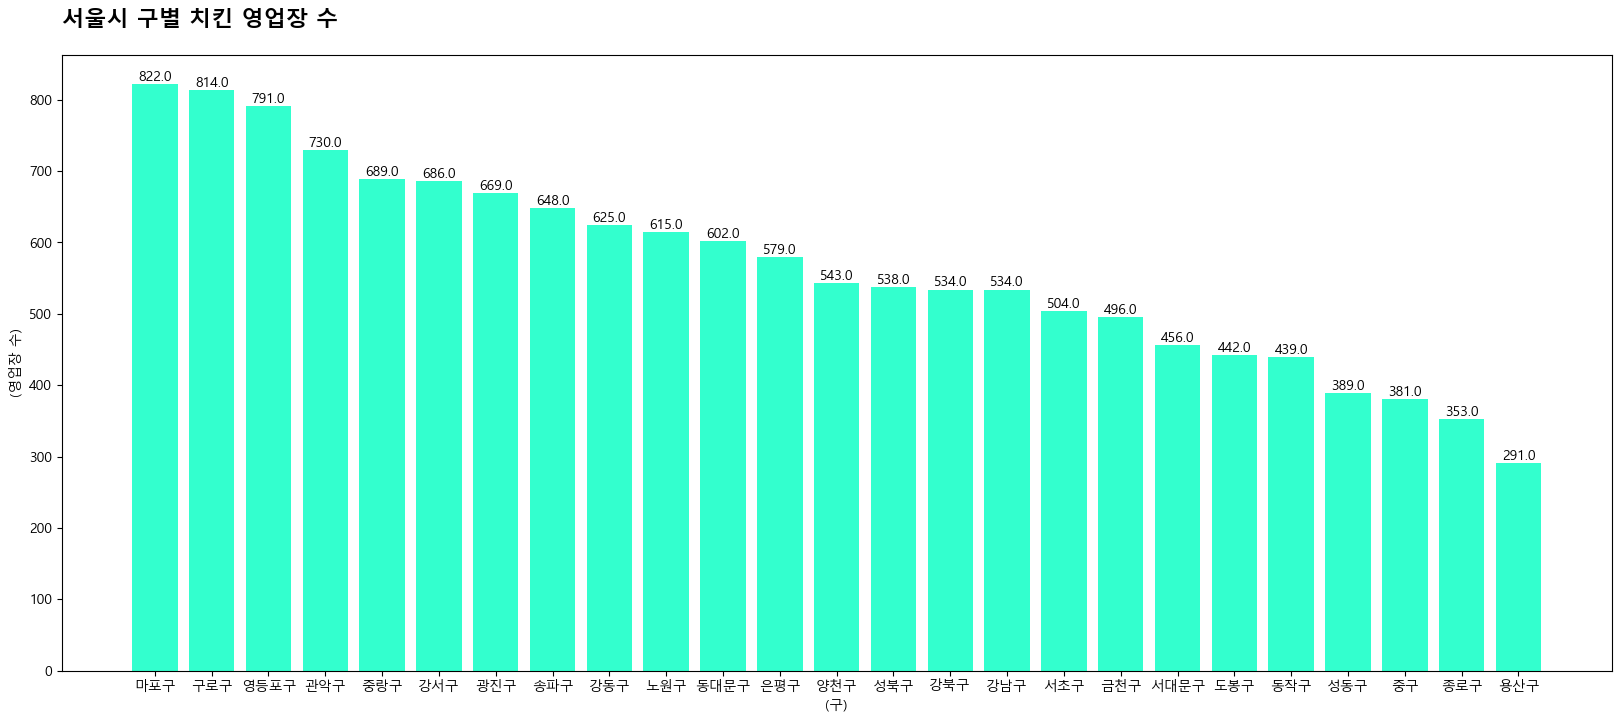

In [211]:
# 구 별 치킨집 수 시각화

plt.rcParams['font.family'] ='Malgun Gothic' # 한글 표시
plt.rcParams['axes.unicode_minus'] =False

x = group1['시군구명']
y = group1['상세영업상태명']

plt.figure(figsize=(20,8))
plt.bar(x, y, color='#33FFCE')
plt.xlabel('(구)')
plt.ylabel('(영업장 수)')

title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('서울시 구별 치킨 영업장 수', fontdict=title_font, loc='left', pad=20)

# 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 10)
    
# plt.grid()
# plt.axis('off')
plt.show()

치킨 집이 가장 많은 '마포구' 와 가장 적은 '용산구'의 트리맵을 살펴보자

In [212]:
# 구 + 동별 치킨 집 수
group2 = df.groupby(['시군구명', '소재지전체주소'], as_index=False).count()
group2

,시군구명,소재지전체주소,상세영업상태명
0,강남구,개포동,36
1,강남구,논현동,85
2,강남구,대치동,78
3,강남구,도곡동,25
4,강남구,삼성동,41
...,...,...,...
392,중랑구,면목동,271
393,중랑구,묵동,68
394,중랑구,상봉동,109
395,중랑구,신내동,49


In [213]:
# 마포구 분리
mapo = group2[group2['시군구명'] == '마포구']
mapo

,시군구명,소재지전체주소,상세영업상태명
86,마포구,공덕동,26
87,마포구,구수동,4
88,마포구,노고산동,16
89,마포구,대흥동,21
90,마포구,도화동,55
91,마포구,동교동,60
92,마포구,마포동,3
93,마포구,망원동,73
94,마포구,상수동,27
95,마포구,상암동,45


In [214]:
# 용산구 분리
yongsan = group2[group2['시군구명'] == '용산구']
yongsan

,시군구명,소재지전체주소,상세영업상태명
234,용산구,갈월동,9
235,용산구,남영동,6
236,용산구,도원동,1
237,용산구,동빙고동,2
238,용산구,동자동,17
239,용산구,문배동,4
240,용산구,보광동,22
241,용산구,산천동,1
242,용산구,서계동,4
243,용산구,신계동,2


#### 트리맵

In [215]:
# ! pip install squarify
import squarify

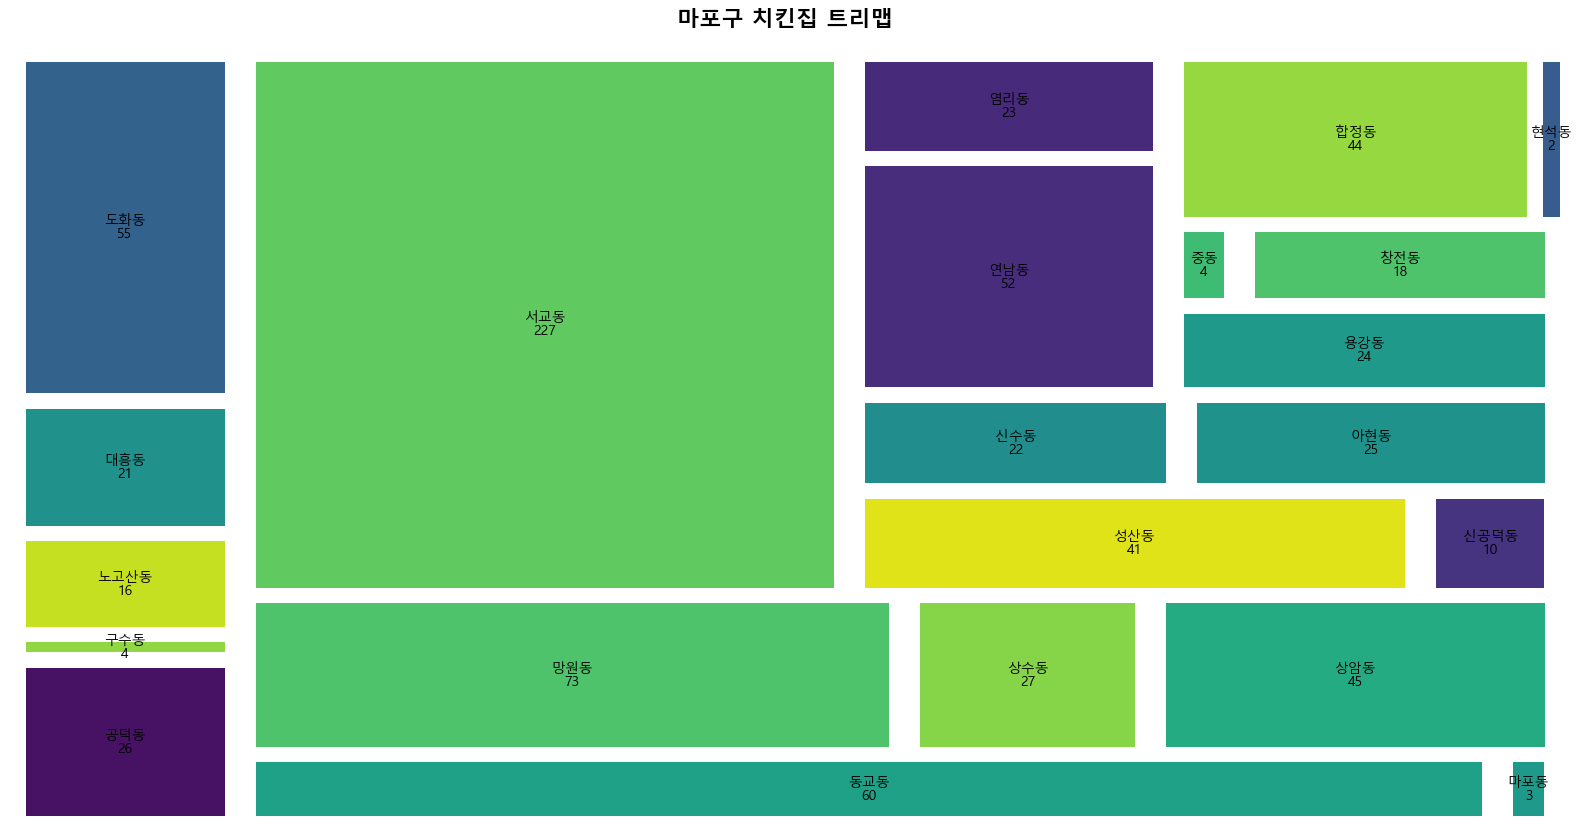

In [216]:
# 마포구 트리맵
plt.figure(figsize=(20, 10))
squarify.plot(sizes=mapo['상세영업상태명'], label = mapo['소재지전체주소'], value = mapo['상세영업상태명'], pad=0.5)
plt.title('마포구 치킨집 트리맵', fontdict=title_font, loc='center', pad=20)
plt.axis('off')
plt.show()

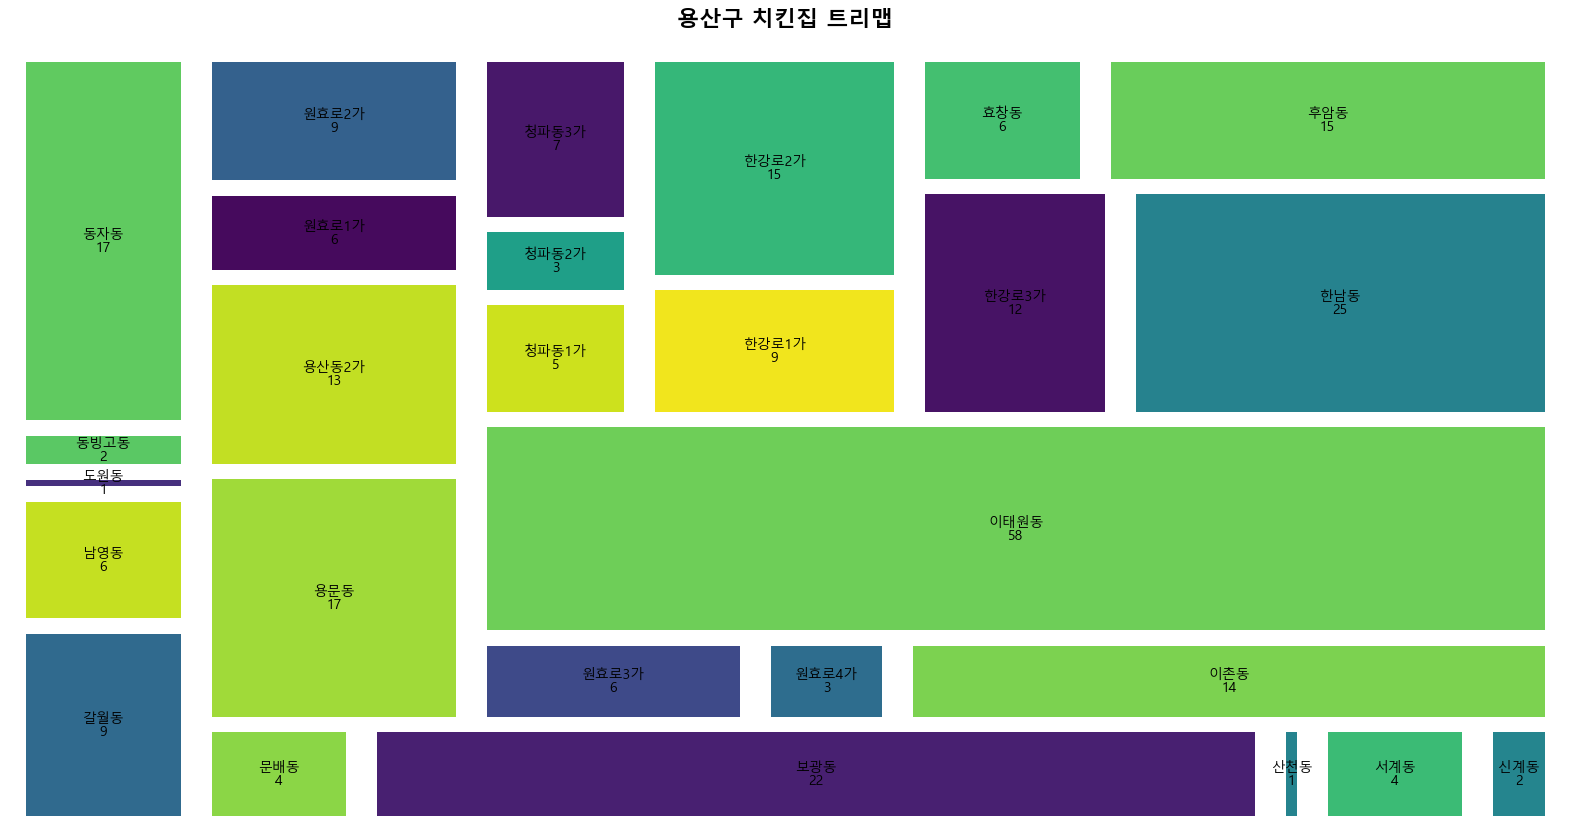

In [218]:
# 용산구 트리맵
plt.figure(figsize=(20, 10))
squarify.plot(sizes=yongsan['상세영업상태명'], label = yongsan['소재지전체주소'], value = yongsan['상세영업상태명'], pad=0.5)
plt.title('용산구 치킨집 트리맵', fontdict=title_font, loc='center', pad=20)
plt.axis('off')
plt.show()